In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# Import classification
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import string

In [2]:
data = pd.read_csv("email_dataset_clear.csv", encoding='latin-1')
data.dropna(inplace=True)


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data['Message'],data['Category'], test_size=0.2, random_state=42)

In [5]:
# Biểu diễn dữ liệu dưới dạng vector TF-IDF

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

NATIVE_BAYES

In [6]:
# native_bayes = MultinomialNB()

In [7]:
# native_bayes.fit(X_train_tfidf, y_train)
from sklearn.pipeline import Pipeline
native_bayes = Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('nb',MultinomialNB())
])
native_bayes.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('nb', MultinomialNB())])

In [8]:
y_pred = native_bayes.predict(X_test) # Sử dụng mô hình đã huấn luyện để dự đoán nhãn cho tập dữ liệu kiểm tra X_test
accuracy1= accuracy_score(y_test, y_pred)
print("NATIVE_BAYES Accuracy:", accuracy1)
print("classification Report:")
print(classification_report(y_test,y_pred))


NATIVE_BAYES Accuracy: 0.9479820627802691
classification Report:
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       949
        spam       1.00      0.65      0.79       166

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.95      0.95      0.94      1115



KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [11]:
knn_classifier.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

In [12]:
from sklearn.metrics import classification_report

In [13]:
y_pred = knn_classifier.predict(X_test_tfidf)
accuracy2 = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy2)
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.9623318385650225
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       949
        spam       1.00      0.75      0.86       166

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.96      0.96      0.96      1115



Support Vector Machines (SVM)

In [14]:
from sklearn.svm import SVC

In [15]:
svm_classifier = SVC(kernel="linear")
svm_classifier.fit(X_train_tfidf,y_train)

SVC(kernel='linear')

In [16]:
y_pred = svm_classifier.predict(X_test_tfidf)
accuracy3 = accuracy_score(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

print("SVM Accuracy: ", accuracy3)
print("classification Report")
print(classification_report(y_test,y_pred))

SVM Accuracy:  0.9847533632286996
classification Report
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       949
        spam       0.97      0.92      0.95       166

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf,y_train)

LogisticRegression()

In [19]:
y_pred = logistic_regression.predict(X_test_tfidf)
accuracy4 = accuracy_score(y_test,y_pred)
print("Logistic Regression Accuracy: ", accuracy4)
print("classification Report:")
print(classification_report(y_test,y_pred))

Logistic Regression Accuracy:  0.9775784753363229
classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       949
        spam       0.99      0.86      0.92       166

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [22]:
y_pred = random_forest.predict(X_test_tfidf)
accuracy5 = accuracy_score(y_test,y_pred)
print("Random Forest Accuracy: ",accuracy5)
print("classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy:  0.9730941704035875
classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       949
        spam       1.00      0.82      0.90       166

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



Gradient Boosting

In [23]:
from sklearn.ensemble import  GradientBoostingClassifier

In [24]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_tfidf,y_train)

GradientBoostingClassifier()

In [25]:
y_pred = gradient_boosting.predict(X_test_tfidf)
accuracy6 = accuracy_score(y_test,y_pred)
print("Gradient Boosting Accuracy: ",accuracy6)
print("classification Report:")
print(classification_report(y_test,y_pred))

Gradient Boosting Accuracy:  0.967713004484305
classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       949
        spam       0.97      0.81      0.88       166

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



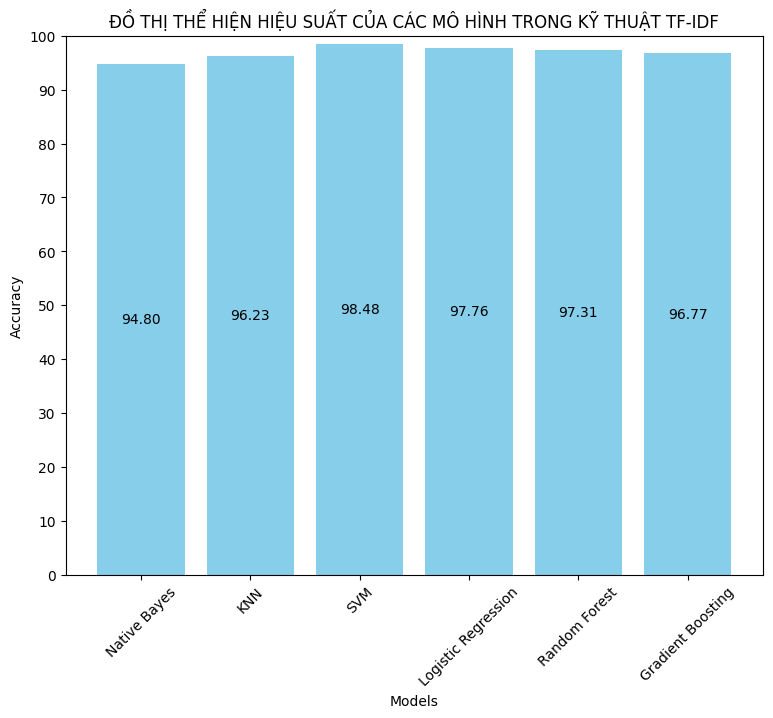

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Các độ chính xác của từng mô hình (ví dụ)
accuracies = [accuracy1*100,accuracy2*100,accuracy3*100,accuracy4*100,accuracy5*100,accuracy6*100]

# Tên các mô hình
models = ["Native Bayes","KNN","SVM","Logistic Regression","Random Forest","Gradient Boosting"]

plt.figure(figsize=(9,7))
bars = plt.bar(models,accuracies,color = "skyblue")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("ĐỒ THỊ THỂ HIỆN HIỆU SUẤT CỦA CÁC MÔ HÌNH TRONG KỸ THUẬT TF-IDF")
plt.ylim(0,100)
plt.yticks(np.arange(0,105,10))
plt.xticks(rotation = 45)

# Ghi số liệu lên trên các cột
for bar,accuracy in zip(bars,accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,f'{accuracy:.2f}', ha = 'center', va = "center")

plt.show()


